In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# Bagged Decision Trees for Classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
# read the data in
df = pd.read_csv("data/Diabetes.csv")

# Let's use some week features to build the tree
X = df[['age','serum_insulin']] # independent variables
y = df['class'].values     # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)


In [8]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2017)

In [11]:
num_trees = 100

# Dection Tree with 5 fold cross validation
# lets restrict max_depth to 1 to have more impure leaves
clf_DT = DecisionTreeClassifier(max_depth=1, random_state=2017).fit(X_train,y_train)
results = cross_val_score(clf_DT, X_train,y_train, cv=kfold)
print ("Decision Tree (stand alone) - CV Train : %.2f" % results.mean())
print ("Decision Tree (stand alone) - Train : %.2f" % metrics.accuracy_score(clf_DT.predict(X_train), y_train))
print ("Decision Tree (stand alone) - Test : %.2f" % metrics.accuracy_score(clf_DT.predict(X_test), y_test))

# Using Adaptive Boosting of 100 iteration
clf_DT_Boost = AdaBoostClassifier(base_estimator=clf_DT, n_estimators=num_trees, learning_rate=0.1, random_state=2017).fit(X_train,y_train)
results = cross_val_score(clf_DT_Boost, X_train, y_train, cv=kfold)
print ("\nDecision Tree (AdaBoosting) - CV Train : %.2f" % results.mean())
print ("Decision Tree (AdaBoosting) - Train : %.2f" % metrics.accuracy_score(clf_DT_Boost.predict(X_train), y_train))
print ("Decision Tree (AdaBoosting) - Test : %.2f" % metrics.accuracy_score(clf_DT_Boost.predict(X_test), y_test))

Decision Tree (stand alone) - CV Train : 0.64
Decision Tree (stand alone) - Train : 0.66
Decision Tree (stand alone) - Test : 0.65


/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensembl


Decision Tree (AdaBoosting) - CV Train : 0.69
Decision Tree (AdaBoosting) - Train : 0.72
Decision Tree (AdaBoosting) - Test : 0.71


***Gradient Boosting***

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Using Gradient Boosting of 100 iterations
clf_GBT = GradientBoostingClassifier(n_estimators=num_trees, learning_rate=0.1, random_state=2017).fit(X_train, y_train)
results = cross_val_score(clf_GBT, X_train, y_train, cv=kfold)

print ("\nGradient Boosting - CV Train : %.2f" % results.mean())
print ("Gradient Boosting - Train : %.2f" % metrics.accuracy_score(clf_GBT.predict(X_train), y_train))
print ("Gradient Boosting - Test : %.2f" % metrics.accuracy_score(clf_GBT.predict(X_test), y_test))



Gradient Boosting - CV Train : 0.68
Gradient Boosting - Train : 0.81
Gradient Boosting - Test : 0.66


***XGBoost (eXtreme Gradient Boosting)***

In [15]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


# read the data in
df = pd.read_csv("data/Diabetes.csv")

predictors = ['age','serum_insulin']
target = 'class'

# Most common preprocessing step include label encoding and missing value treatment
from sklearn import preprocessing 
for f in df.columns: 
    if df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(df[f].values)) 
        df[f] = lbl.transform(list(df[f].values))

df.fillna((-999), inplace=True) 

# Let's use some week features to build the tree
X = df[['age','serum_insulin']] # independent variables
y = df['class'].values     # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)
num_rounds = 100

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2017)

clf_XGB = XGBClassifier(n_estimators = num_rounds, 
                        objective= 'binary:logistic',
                        seed=2017)

# use early_stopping_rounds to stop the cv when there is no score imporovement
clf_XGB.fit(X_train,y_train, early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=False)

results = cross_val_score(clf_XGB, X_train,y_train, cv=kfold)
print ("\nxgBoost - CV Train : %.2f" % results.mean())
print ("xgBoost - Train : %.2f" % metrics.accuracy_score(clf_XGB.predict(X_train), y_train))
print ("xgBoost - Test : %.2f" % metrics.accuracy_score(clf_XGB.predict(X_test), y_test))


xgBoost - CV Train : 0.69
xgBoost - Train : 0.78
xgBoost - Test : 0.69


/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


***XGBoost using native interface***

In [24]:
xgtrain = xgb.DMatrix(X_train, label=y_train, missing=-999)
xgtest = xgb.DMatrix(X_test, label=y_test, missing=-999)

# set xgboost params
param = {'max_depth': 3,  # the maximum depth of each tree
         'objective': 'binary:logistic'}

clf_xgb_cv = xgb.cv(param, xgtrain, num_rounds, 
                    stratified=True, 
                    nfold=5, 
                    early_stopping_rounds=20, 
                    seed=2017)

print ("Optimal number of trees/estimators is %i" % clf_xgb_cv.shape[0])

watchlist  = [(xgtest,'test'), (xgtrain,'train')]                
clf_xgb = xgb.train(param, xgtrain,clf_xgb_cv.shape[0], watchlist)


# predict function will produce the probability 
# so we'll use 0.5 cutoff to convert probability to class label
y_train_pred = (clf_xgb.predict(xgtrain, ntree_limit=clf_xgb.best_iteration) > 0.5).astype(int)
y_test_pred = (clf_xgb.predict(xgtest, ntree_limit=clf_xgb.best_iteration) > 0.5).astype(int)


print ("XGB - Train : %.2f" % metrics.accuracy_score(y_train_pred, y_train))
print ("XGB - Test : %.2f" % metrics.accuracy_score(y_test_pred, y_test))

Optimal number of trees/estimators is 8
[0]	test-logloss:0.60036	train-logloss:0.61159
[1]	test-logloss:0.57427	train-logloss:0.58858
[2]	test-logloss:0.56364	train-logloss:0.57108
[3]	test-logloss:0.55409	train-logloss:0.55749
[4]	test-logloss:0.54665	train-logloss:0.54483
[5]	test-logloss:0.54283	train-logloss:0.53793
[6]	test-logloss:0.54200	train-logloss:0.53390
[7]	test-logloss:0.54120	train-logloss:0.52889


/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


AttributeError: `best_iteration` is only defined when early stopping is used.

***How does the decision boudary look?***

/tmp/ipykernel_10062/2086624586.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
/tmp/ipykernel_10062/2086624586.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
/tmp/ipykernel_10062/2086624586.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have 

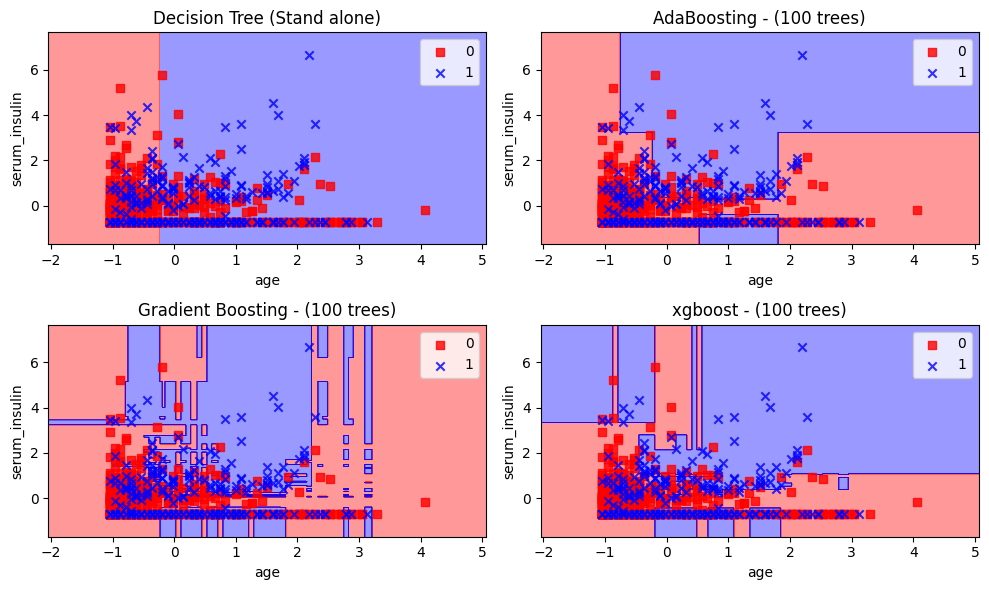

In [25]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Plot the decision boundary
plt.figure(figsize=(10,6))
plt.subplot(221)
plot_decision_regions(X, y, clf_DT)
plt.title('Decision Tree (Stand alone)')
plt.xlabel('age')
plt.ylabel('serum_insulin')
plt.legend(loc='best')

plt.subplot(222)
plot_decision_regions(X, y, clf_DT_Boost)
plt.title('AdaBoosting - (100 trees)')
plt.xlabel('age')
plt.ylabel('serum_insulin')
plt.legend(loc='best')

plt.subplot(223)
plot_decision_regions(X, y, clf_GBT)
plt.title('Gradient Boosting - (100 trees)')
plt.xlabel('age')
plt.ylabel('serum_insulin')
plt.legend(loc='best')

plt.subplot(224)
plot_decision_regions(X, y, clf_XGB)
plt.title('xgboost - (100 trees)')
plt.xlabel('age')
plt.ylabel('serum_insulin')
plt.legend(loc='best')
plt.tight_layout()